In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


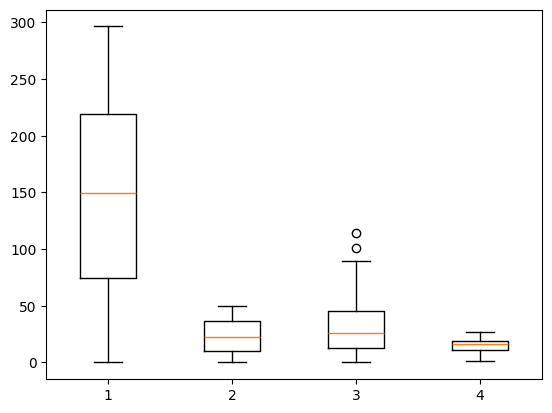

In [30]:
plt.boxplot(df)
plt.show()

In [44]:
column = ["TV", "Radio", "Newspaper"]
df_ = df[column]
min_value = df_.min()
max_value = df_.max()

In [45]:
# SAVE THESE MINIMUM AND MAXIMUM VALUES
import joblib
joblib.dump(min_value, "min_values.pkl")
joblib.dump(max_value, "max_values.pkl")

['max_values.pkl']

In [46]:
# normalizing 
for col in column:
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

In [47]:
# removing the outliers if any

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+iqr*1.5
    lower_bound = q1-iqr*1.5
    df[col] = df[col].apply(lambda x : upper_bound if x>upper_bound else lower_bound if x<lower_bound else x)
print('data without outliers : ')
df

data without outliers : 


,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9
...,...,...,...,...
195,0.126818,0.074597,0.118734,7.6
196,0.316199,0.098790,0.068602,14.0
197,0.596212,0.187500,0.053650,14.8
198,0.956713,0.846774,0.579595,25.5


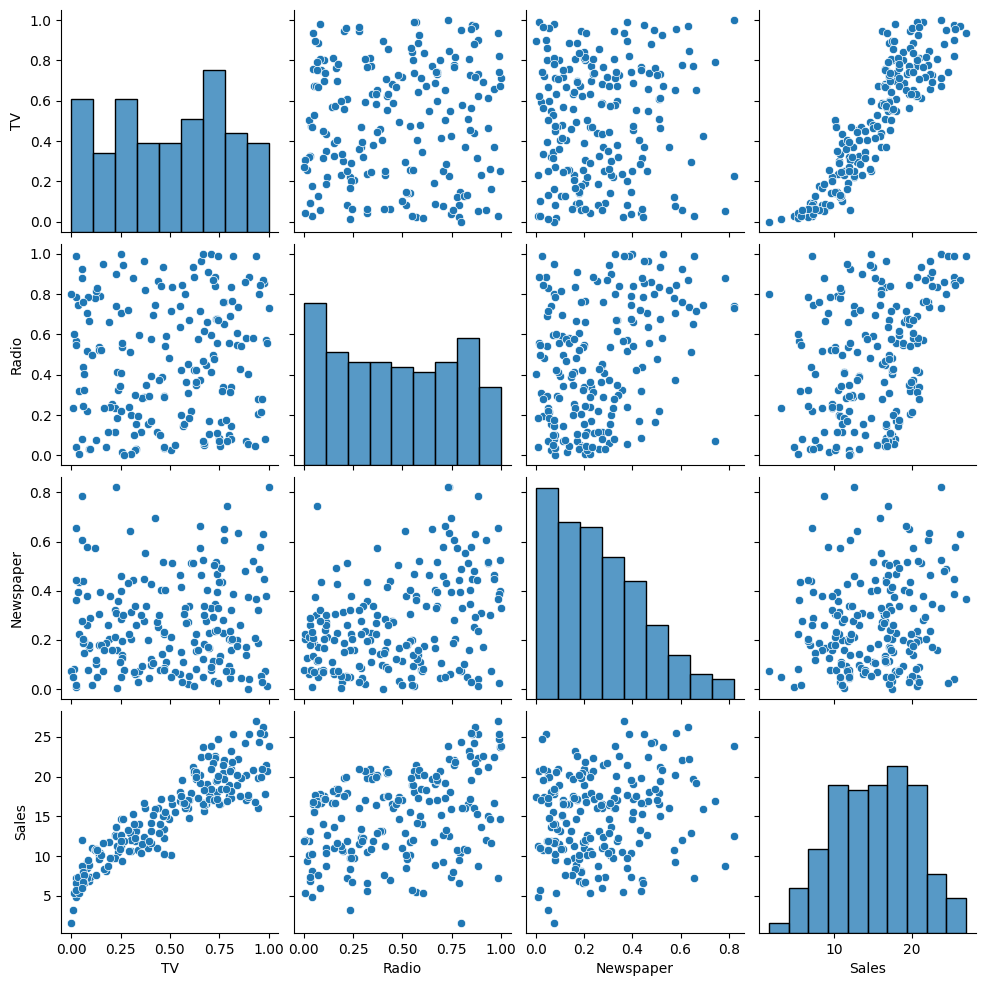

In [48]:

import seaborn as sns

sns.pairplot(df)
plt.show()

In [49]:
x = df[["TV", "Radio", "Newspaper"]].values  # ensures all 3 features
y = df["Sales"].values

In [50]:
class linear_regression_():
    def __init__(self, epochs = 1000, learning_rate = 0.1):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, x,y):
        n_samples, n_features = x.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            prediction = self.predict(x)

            dw = np.dot(x.T, (prediction-y)) / n_samples
            db = np.sum(prediction-y)/n_samples

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self,x):
        prediction = np.dot(x, self.weights) + self.bias
        return prediction


model = linear_regression_()
model.fit(x,y)

print("Weights (coefficients):", model.weights)
print("Bias (intercept):", model.bias)

Weights (coefficients): [16.08295946  5.26266769  0.15666404]
Bias (intercept): 4.66156328475459
